In [22]:
%pip install ipykernel numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Дані
# Підготовчий етап

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [24]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def print_accuracy(y_test, y_pred, name="Model"):
    print("-"*60, f"{name}\n", sep='\n')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

Перші 5 рядків:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


------------------------------------------------------------
Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1

None

------------------------------------------------------------
Описова статистика:


,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


------------------------------------------------------------
Пропуски в даних:
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


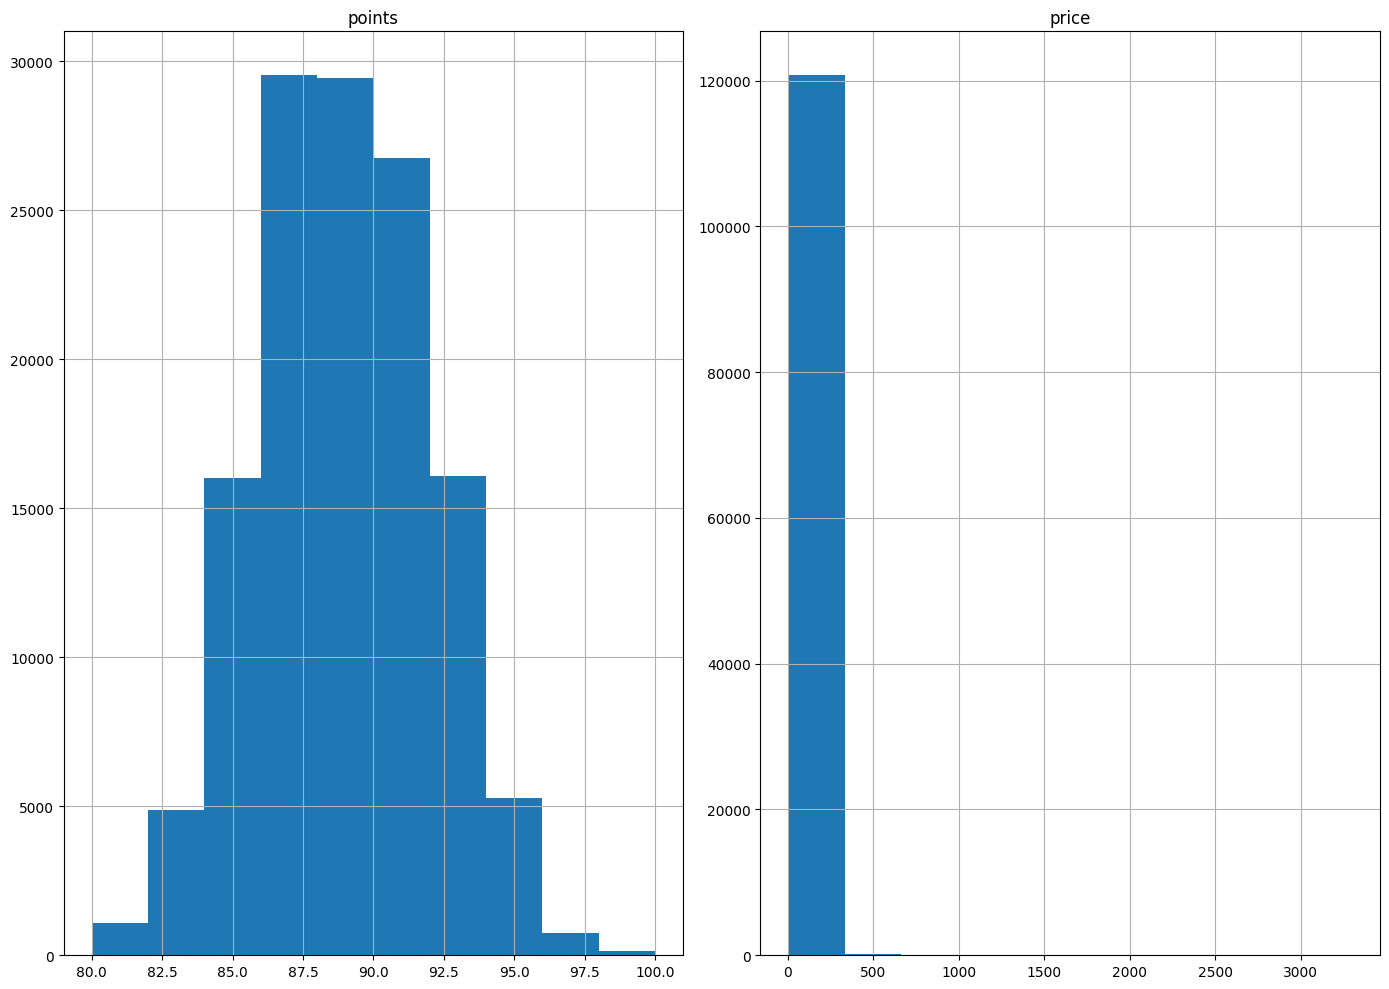

In [25]:
filename = "data/winemag-data-130k-v2.csv"
data = pd.read_csv(filename, index_col=0)

print("Перші 5 рядків:")
display(data.head())

print("-"*60, "Інформація про дані:", sep='\n')
display(data.info())

print("-"*60, "Описова статистика:", sep='\n')
display(data.describe().T)

print("-"*60, "Пропуски в даних:", sep='\n')
print(data.isnull().sum())

data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

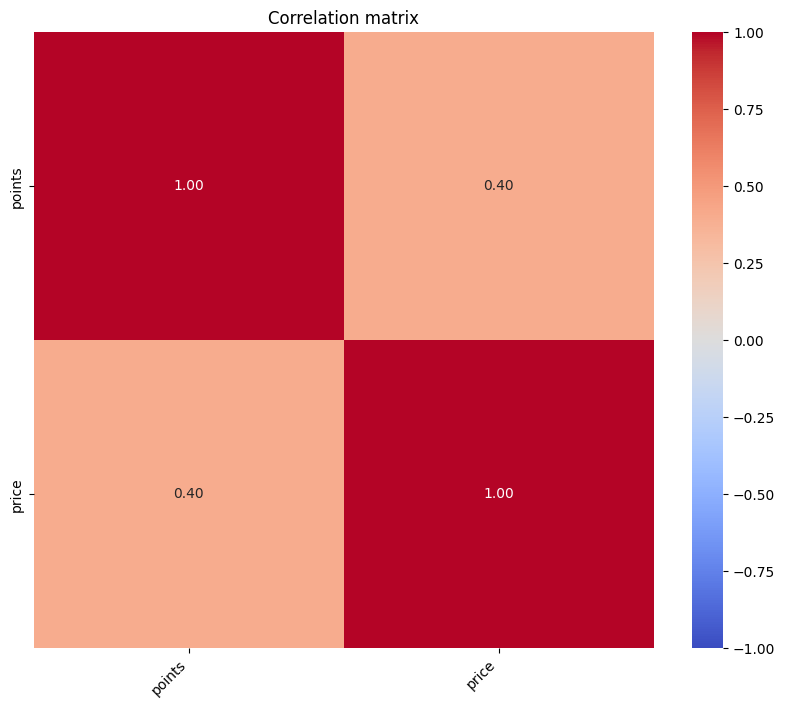

In [26]:
points_median = data.loc[data["points"] > 0, "points"].median()
data.loc[data["points"].isnull(), "points"] = points_median

price_median = data.loc[data["price"] > 0, "price"].median()
data.loc[data["price"].isnull(), "price"] = price_median

data_ = data[["points", "price"]]

corr = data_.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation matrix')
plt.show()

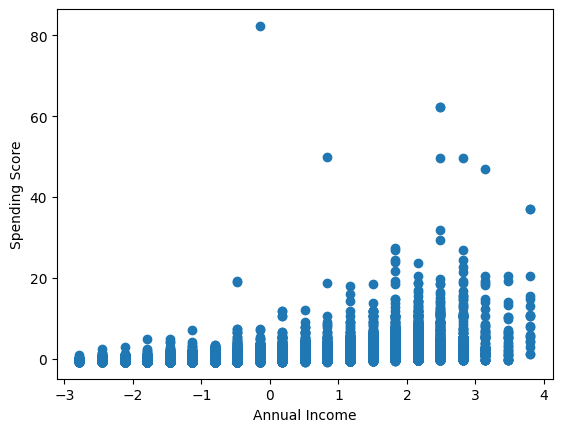

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_)
plt.scatter(*X_scaled.T)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Реалізація моделі

Вивчити засади роботи з методами без учителя та основні методи для розв'язання задачі кластеризації. Написати код для кластеризації для обраного набору даних та підбір оптимальної кількості кластерів (реалізувати алгоритм кластеризації KMeans на NumPy)

На максимальну оцінку також продемонструвати роботу ще двох на вибір алгоритмів кластеризації з бібліотеки Sklearn.

In [28]:
def kmeans_np(X, K=3, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    # Випадкові центроїди
    centroids = X[np.random.choice(n_samples, K, replace=False)]
    
    for _ in range(max_iters):
        # Присвоєння кластерів
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Оновлення центроїдів
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Перевірка на збіжність
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
        
    return labels, centroids

labels, centroids = kmeans_np(X_scaled, K=3)

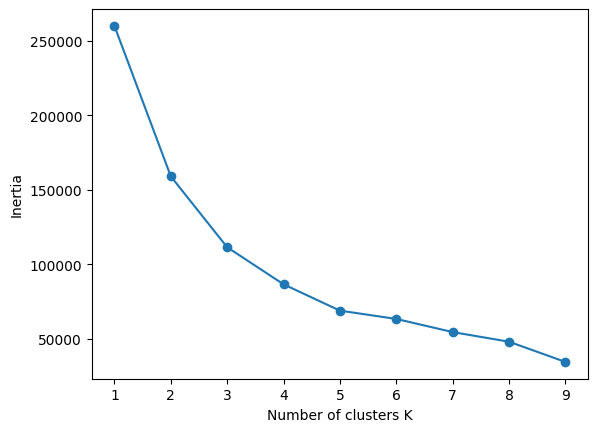

In [29]:
inertia = []
K_range = range(1, 10)
for K in K_range:
    labels, centroids = kmeans_np(X_scaled, K)
    sse = sum(np.sum((X_scaled[labels == k] - centroids[k])**2) for k in range(K))
    inertia.append(sse)

plt.plot(K_range, inertia, 'o-')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia")
plt.show()


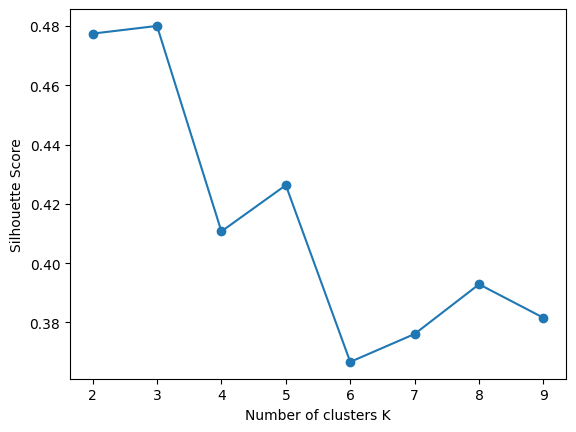

In [30]:
from sklearn.metrics import silhouette_score
scores = []
for K in range(2, 10):
    labels, _ = kmeans_np(X_scaled, K)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.plot(range(2,10), scores, 'o-')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.show()


In [31]:
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)

db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(X_scaled)

MemoryError: Unable to allocate 7.87 GiB for an array with shape (8446165435,) and data type bool

# Аналіз результатів
1. Вибір оптимальної кількості кластерів
2. Оцінка результатів роботи кластеризації при різній кількості кластерів
3. Результати оформити протоколом

In [ ]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x')
plt.show()

# Контрольні питання
1. Як працюють методи машинного навчання без учителя?
2. Критерій оптимальної кількості кластерів?